In [1]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from itertools import combinations


In [2]:
id_1 = 8092 #change to first student id
id_2 = 7972 #change to second student id
id_3 = 8088 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="Data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path)
all_columns = all_data.columns.tolist()

target_column = 'smoking'

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

['age', 'relaxation', 'hemoglobin', 'id', 'LDL', 'hearing(right)', 'Gtp', 'eyesight(left)', 'fasting blood sugar', 'hearing(left)']


LDL (low-density lipoprotein) cholesterol.

guanosine triphosphate (GTP)

Inspect few rows of the dataset

In [3]:
print(sample_df.shape)
sample_df.head()

(140838, 11)


age  relaxation  hemoglobin  id    LDL  hearing(right)   Gtp  \
0  55.0        87.0        16.5   0   75.0             1.0  27.0   
1  70.0        83.0        16.2   1  126.0             2.0  37.0   
2  20.0        75.0        17.4   2   93.0             1.0  53.0   
3  35.0        88.0        15.9   3  102.0             1.0  30.0   
4  30.0        76.0        15.4   4   93.0             1.0  17.0   

   eyesight(left)  fasting blood sugar  hearing(left)  smoking  
0             0.5                 94.0            1.0      1.0  
1             0.6                147.0            2.0      0.0  
2             0.4                 79.0            1.0      1.0  
3             1.5                 91.0            1.0      0.0  
4             1.5                 91.0            1.0      1.0

In [4]:
# Check for unique values in each column to identify potential categorical data
for column in sample_df.columns:
    print(f"{column}: {sample_df[column].unique()[:10]}")  # Display first 10 unique values

age: [55. 70. 20. 35. 30. 50. 45. 40. 60. 25.]
relaxation: [87. 83. 75. 88. 76. 95. 91. 80. 70. 60.]
hemoglobin: [16.5 16.2 17.4 15.9 15.4 13.  14.5 15.7 13.2 12.9]
id: [0 1 2 3 4 5 6 7 8 9]
LDL: [ 75. 126.  93. 102.  99. 122. 198. 150. 101.  56.]
hearing(right): [ 1.  2. nan]
Gtp: [ 27.  37.  53.  30.  17. 119.  16.  31.  14.   8.]
eyesight(left): [0.5 0.6 0.4 1.5 1.2 0.7 0.8 1.  2.  0.9]
fasting blood sugar: [ 94. 147.  79.  91. 101.  84. 100. 104.  64.  71.]
hearing(left): [ 1.  2. nan]
smoking: [ 1.  0. nan]


Identify categorical columns

In [5]:
# Convert 'smoking' to categorical type
sample_df[target_column] = sample_df[target_column].astype('category')


In [6]:
categorical_columns = ['hearing(left)', 'hearing(right)']
sample_df[categorical_columns] = sample_df[categorical_columns].astype('category')

Convert specified columns to categorical type

In [7]:
for column in categorical_columns:
    if column in sample_df.columns:
        sample_df[column] = sample_df[column].astype('category')

Check for missing values

In [8]:
# print(sample_df.isnull().sum())
sample_df.isnull().sum()

age                    1
relaxation             1
hemoglobin             1
id                     0
LDL                    1
hearing(right)         1
Gtp                    1
eyesight(left)         1
fasting blood sugar    1
hearing(left)          1
smoking                1
dtype: int64

Display summary statistics for numerical features

In [9]:
sample_df.describe()

age     relaxation     hemoglobin             id  \
count  140837.000000  140837.000000  140837.000000  140838.000000   
mean       44.305055      76.869239      14.796694   70418.500000   
std        11.842863       8.994045       1.431905   40656.572943   
min        20.000000      44.000000       4.900000       0.000000   
25%        40.000000      70.000000      13.800000   35209.250000   
50%        40.000000      78.000000      15.000000   70418.500000   
75%        55.000000      82.000000      15.800000  105627.750000   
max        85.000000     133.000000      21.000000  140837.000000   

                 LDL            Gtp  eyesight(left)  fasting blood sugar  
count  140837.000000  140837.000000   140837.000000        140837.000000  
mean      114.599665      36.156869        1.005086            98.327031  
std        28.302553      31.023896        0.399830            15.292375  
min         1.000000       2.000000        0.100000            46.000000  
25%        95.000000      18.000000        0.800000            90.000000  
50%       114.000000      27.000000        1.000000            96.000000  
75%       133.000000      44.000000        1.200000           103.000000  
max      1860.000000     999.000000        9.900000           375.000000

Get information about data types

In [10]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140838 entries, 0 to 140837
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  140837 non-null  float64 
 1   relaxation           140837 non-null  float64 
 2   hemoglobin           140837 non-null  float64 
 3   id                   140838 non-null  int64   
 4   LDL                  140837 non-null  float64 
 5   hearing(right)       140837 non-null  category
 6   Gtp                  140837 non-null  float64 
 7   eyesight(left)       140837 non-null  float64 
 8   fasting blood sugar  140837 non-null  float64 
 9   hearing(left)        140837 non-null  category
 10  smoking              140837 non-null  category
dtypes: category(3), float64(7), int64(1)
memory usage: 9.0 MB


In [11]:
print("Hearing(left) Value Counts:")
print(sample_df['hearing(left)'].value_counts())
print("\nHearing(right) Value Counts:")
print(sample_df['hearing(right)'].value_counts())


Hearing(left) Value Counts:
hearing(left)
1.0    137422
2.0      3415
Name: count, dtype: int64

Hearing(right) Value Counts:
hearing(right)
1.0    137535
2.0      3302
Name: count, dtype: int64


Univariate Analysis


Analyze each feature individually.

Numerical Features:

Visualize distributions and identify outliers:


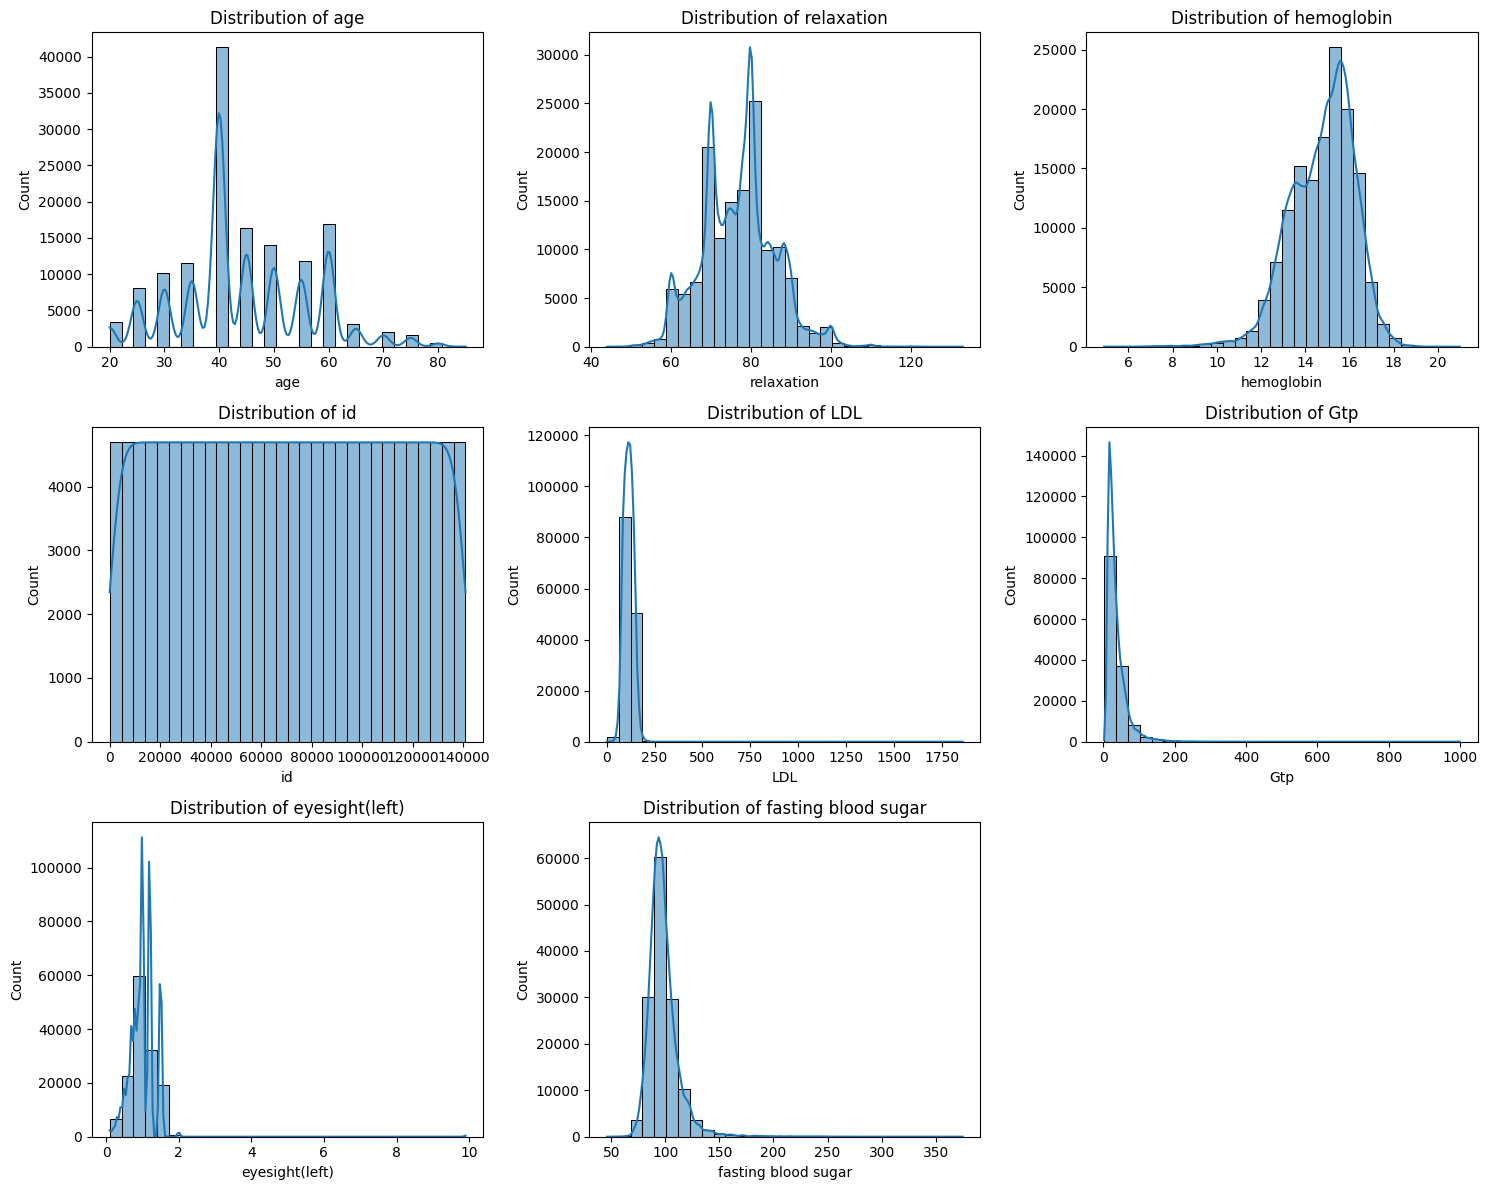

In [12]:
# Number of rows and columns based on the number of features
numerical_columns = sample_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_plots = len(numerical_columns)
rows = math.ceil(num_plots / 3)  # 3 plots per row (adjust as needed)
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figsize for clarity
axes = axes.flatten()  # Flatten to a 1D array

# Iterate over numerical columns and plot
for i, column in enumerate(numerical_columns):
    sns.histplot(sample_df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
sample_df[numerical_columns].describe()

age     relaxation     hemoglobin             id  \
count  140837.000000  140837.000000  140837.000000  140838.000000   
mean       44.305055      76.869239      14.796694   70418.500000   
std        11.842863       8.994045       1.431905   40656.572943   
min        20.000000      44.000000       4.900000       0.000000   
25%        40.000000      70.000000      13.800000   35209.250000   
50%        40.000000      78.000000      15.000000   70418.500000   
75%        55.000000      82.000000      15.800000  105627.750000   
max        85.000000     133.000000      21.000000  140837.000000   

                 LDL            Gtp  eyesight(left)  fasting blood sugar  
count  140837.000000  140837.000000   140837.000000        140837.000000  
mean      114.599665      36.156869        1.005086            98.327031  
std        28.302553      31.023896        0.399830            15.292375  
min         1.000000       2.000000        0.100000            46.000000  
25%        95.000000      18.000000        0.800000            90.000000  
50%       114.000000      27.000000        1.000000            96.000000  
75%       133.000000      44.000000        1.200000           103.000000  
max      1860.000000     999.000000        9.900000           375.000000

Boxplots: To check for outliers.

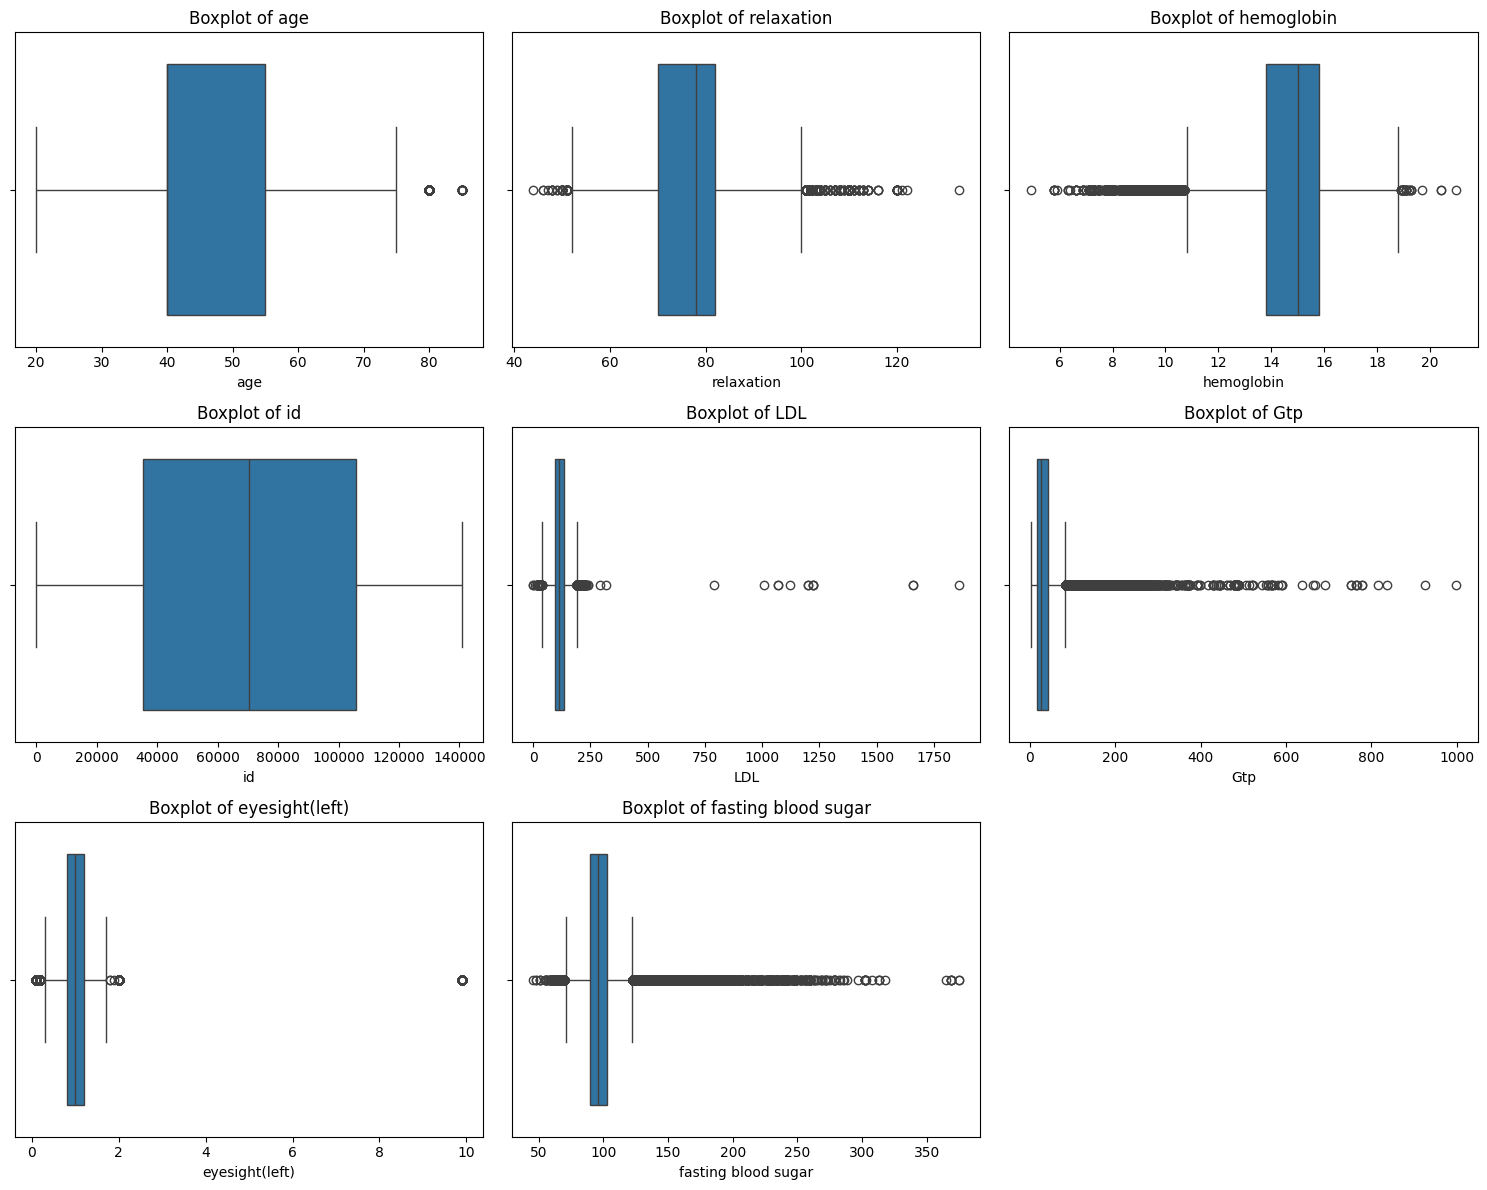

In [14]:
# Identify numerical columns
numerical_columns = sample_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the number of plots (numerical features)
num_plots = len(numerical_columns)

# Number of rows and columns for subplots
rows = math.ceil(num_plots / 3)  # 3 plots per row (adjust as needed)
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to a 1D array

# Iterate over numerical columns and create a boxplot for each
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=sample_df, x=column, ax=axes[i])  # Use ax=axes[i] for specific subplot
    axes[i].set_title(f'Boxplot of {column}')

# Remove unused subplots if the number of features is less than the grid size
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical Features

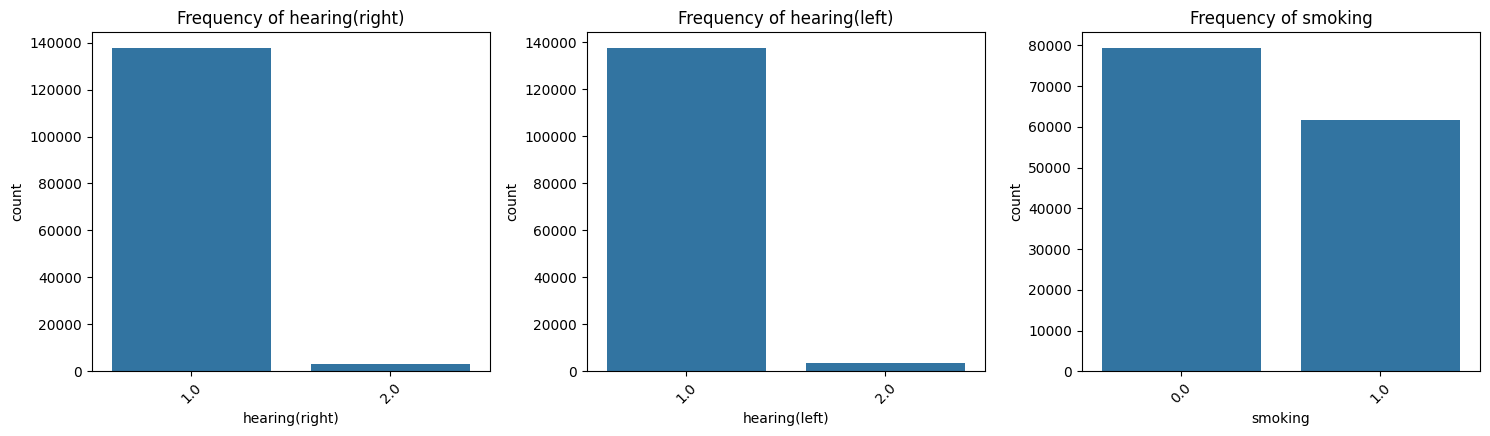

In [15]:
# Get categorical columns
categorical_columns = sample_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if there are any categorical columns
if len(categorical_columns) > 0:
    # Number of rows and columns based on the number of features
    num_plots = len(categorical_columns)
    rows = math.ceil(num_plots / 2)  # 2 plots per row (adjust as needed)
    cols = 3

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figsize for clarity
    axes = axes.flatten()  # Flatten to a 1D array

    # Iterate over categorical columns and plot
    for i, column in enumerate(categorical_columns):
        sns.countplot(data=sample_df, x=column, ax=axes[i])
        axes[i].set_title(f'Frequency of {column}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Remove unused subplots
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Bivariate Analysis

Numerical Features


Correlation Heatmap

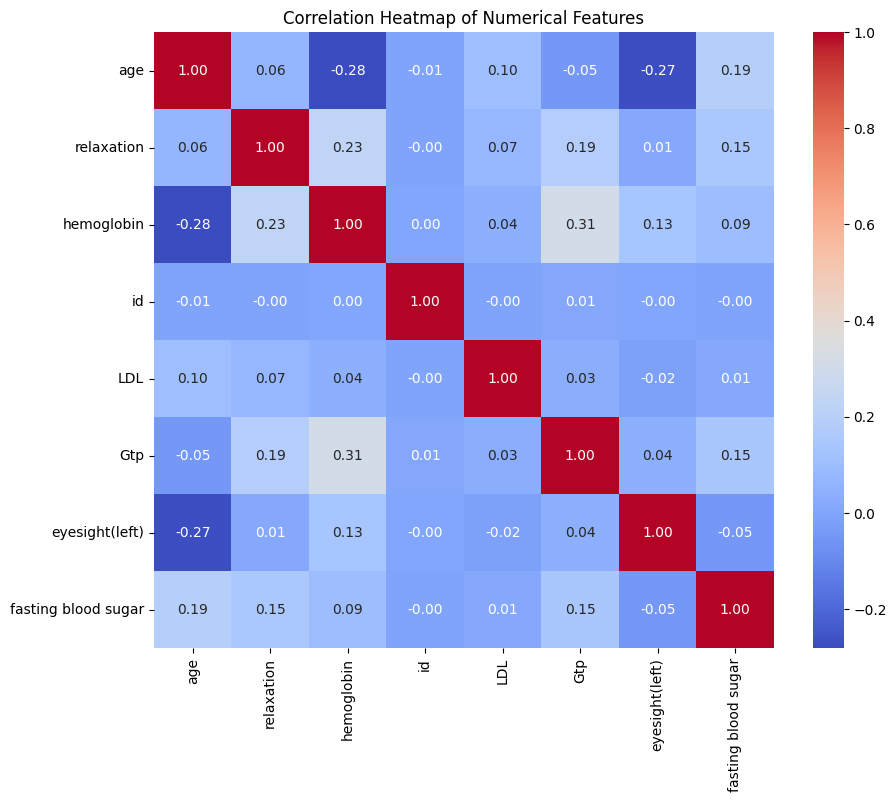

In [16]:
correlation_matrix = sample_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Scatter Plots for Pairwise Relationships

<ipython-input-17-581c00fd65ec>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


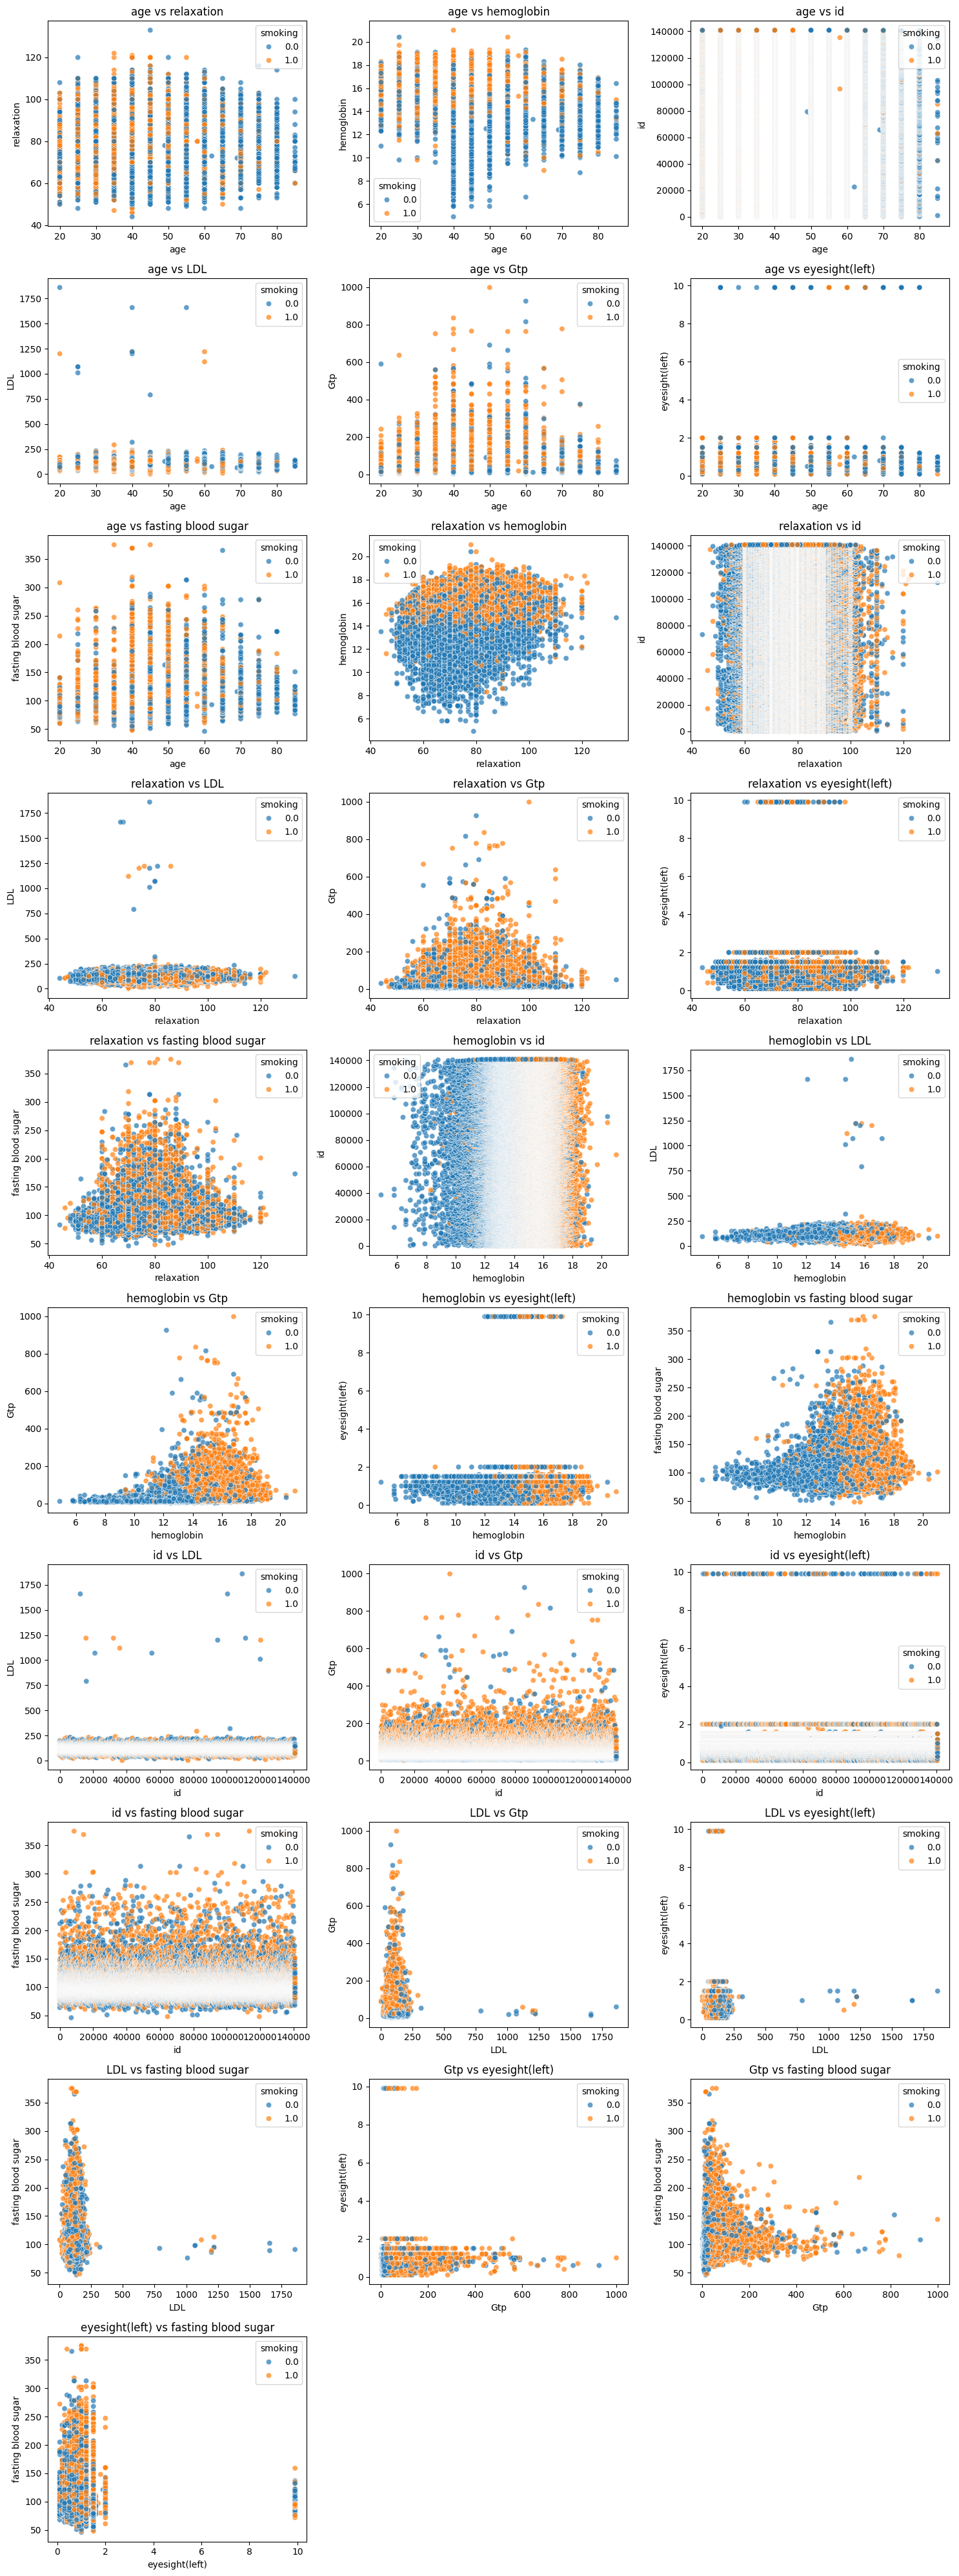

In [17]:
# Generate feature pairs for scatter plots
scatter_features = [(numerical_columns[i], numerical_columns[j]) for i in range(len(numerical_columns))
                    for j in range(i + 1, len(numerical_columns))]

# Number of rows and columns for subplots
num_plots = len(scatter_features)
rows = math.ceil(num_plots / 3)  # Adjust to 3 plots per row (or other layout)
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to a 1D array for easier indexing

# Plot scatter plots for each pair
for i, (feature_x, feature_y) in enumerate(scatter_features):
    sns.scatterplot(data=sample_df, x=feature_x, y=feature_y, hue=target_column, alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{feature_x} vs {feature_y}")

# Remove unused subplots
for j in range(len(scatter_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Categorical Features

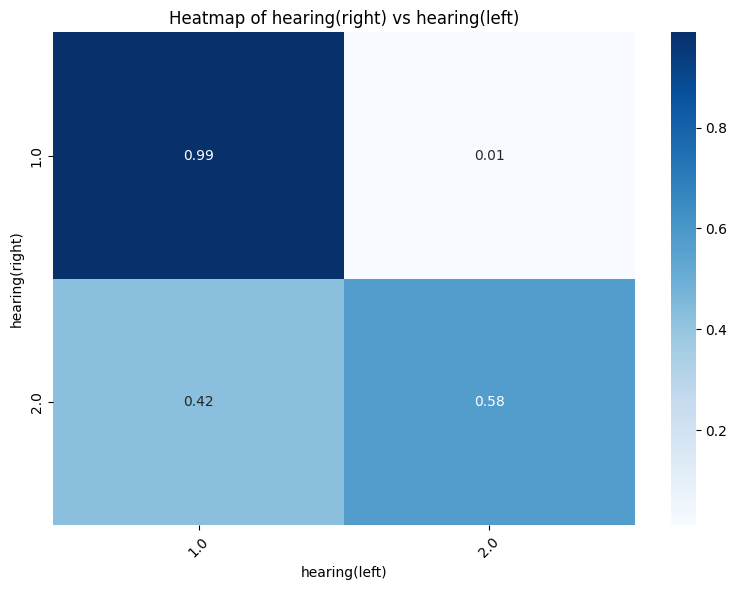

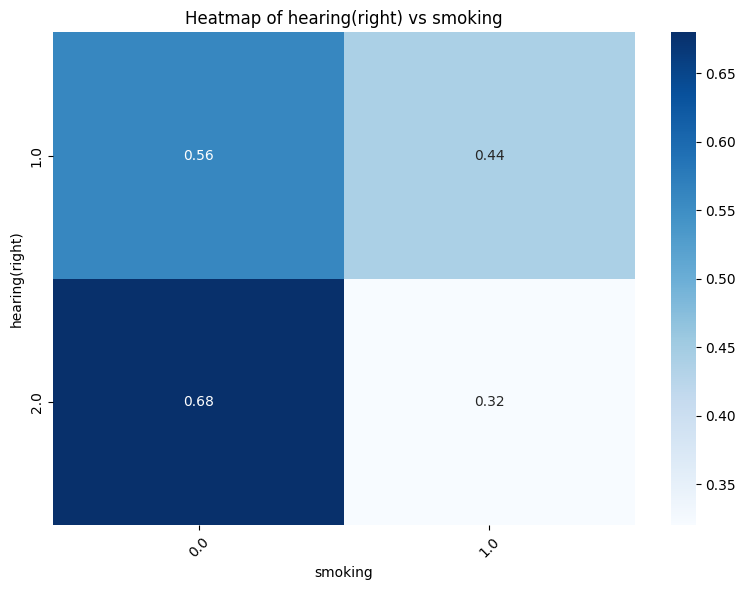

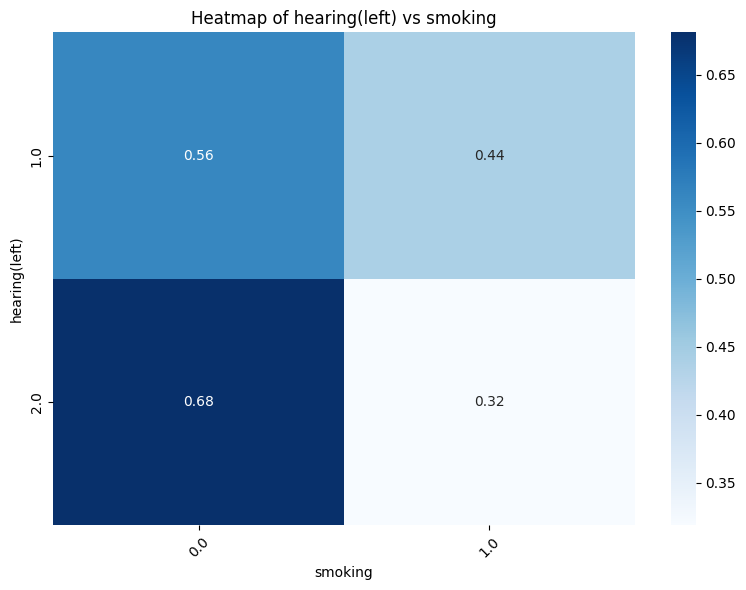

In [18]:
categorical_pairs = list(combinations(categorical_columns, 2))

# Visualize each pair
for cat1, cat2 in categorical_pairs:
    # Cross-tabulation
    crosstab = pd.crosstab(sample_df[cat1], sample_df[cat2], normalize='index')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues", cbar=True)
    plt.title(f'Heatmap of {cat1} vs {cat2}')
    plt.xlabel(cat2)
    plt.ylabel(cat1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-19-67b771f1ee36>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


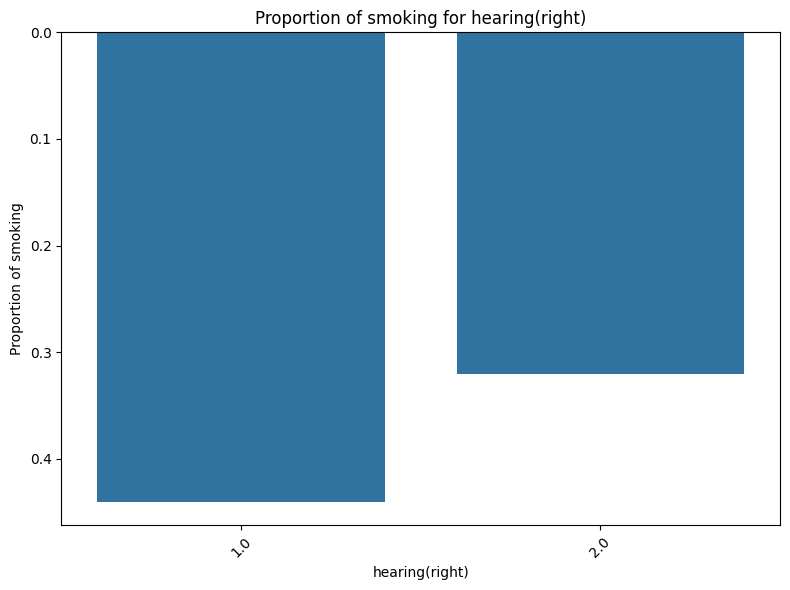

<ipython-input-19-67b771f1ee36>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


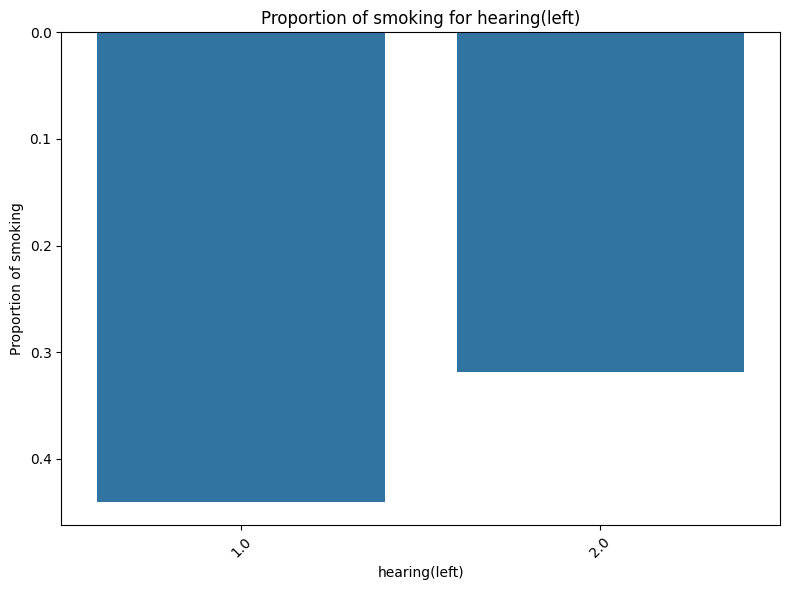

<ipython-input-19-67b771f1ee36>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


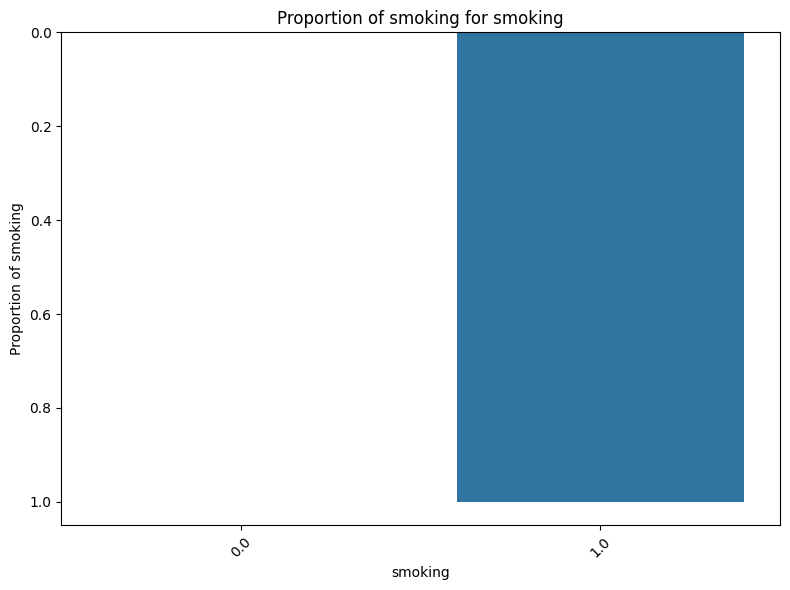

In [19]:
# Bar plots grouped by the target variable
for cat_col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=sample_df,
        x=cat_col,
        y=target_column,
        ci=None,
        estimator=lambda x: sum(x) / len(x)  # Proportion calculation
    )
    plt.title(f"Proportion of {target_column} for {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(f"Proportion of {target_column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Multivariate Analysis

Pair Plot

In [20]:
print(sample_df.dtypes)


age                     float64
relaxation              float64
hemoglobin              float64
id                        int64
LDL                     float64
hearing(right)         category
Gtp                     float64
eyesight(left)          float64
fasting blood sugar     float64
hearing(left)          category
smoking                category
dtype: object


In [21]:
valid_columns = numerical_columns + categorical_columns + [target_column]
valid_columns = [
    col for col in valid_columns
    if sample_df[col].apply(lambda x: np.isscalar(x) and isinstance(x, (int, float, str))).all()
]


In [22]:
sample_df[valid_columns].head()


age  relaxation  hemoglobin  id    LDL   Gtp  eyesight(left)  \
0  55.0        87.0        16.5   0   75.0  27.0             0.5   
1  70.0        83.0        16.2   1  126.0  37.0             0.6   
2  20.0        75.0        17.4   2   93.0  53.0             0.4   
3  35.0        88.0        15.9   3  102.0  30.0             1.5   
4  30.0        76.0        15.4   4   93.0  17.0             1.5   

   fasting blood sugar hearing(right) hearing(left) smoking smoking  
0                 94.0            1.0           1.0     1.0     1.0  
1                147.0            2.0           2.0     0.0     0.0  
2                 79.0            1.0           1.0     1.0     1.0  
3                 91.0            1.0           1.0     0.0     0.0  
4                 91.0            1.0           1.0     1.0     1.0

In [23]:
valid_columns = [col for col in valid_columns if sample_df[col].apply(lambda x: np.isscalar(x)).all()]


In [24]:
sample_df[valid_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140838 entries, 0 to 140837
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  140837 non-null  float64 
 1   relaxation           140837 non-null  float64 
 2   hemoglobin           140837 non-null  float64 
 3   id                   140838 non-null  int64   
 4   LDL                  140837 non-null  float64 
 5   Gtp                  140837 non-null  float64 
 6   eyesight(left)       140837 non-null  float64 
 7   fasting blood sugar  140837 non-null  float64 
 8   hearing(right)       140837 non-null  category
 9   hearing(left)        140837 non-null  category
 10  smoking              140837 non-null  category
 11  smoking              140837 non-null  category
dtypes: category(4), float64(7), int64(1)
memory usage: 9.1 MB


In [25]:
sample_df[valid_columns].dropna()

age  relaxation  hemoglobin      id    LDL    Gtp  eyesight(left)  \
0       55.0        87.0        16.5       0   75.0   27.0             0.5   
1       70.0        83.0        16.2       1  126.0   37.0             0.6   
2       20.0        75.0        17.4       2   93.0   53.0             0.4   
3       35.0        88.0        15.9       3  102.0   30.0             1.5   
4       30.0        76.0        15.4       4   93.0   17.0             1.5   
...      ...         ...         ...     ...    ...    ...             ...   
140832  50.0        70.0        13.1  140832  135.0   25.0             0.8   
140833  45.0        60.0        14.3  140833  140.0   27.0             0.9   
140834  40.0        88.0        14.5  140834   72.0  107.0             1.0   
140835  50.0        70.0        14.6  140835  151.0   18.0             0.3   
140836  55.0        76.0        14.8  140836  141.0   24.0             1.0   

        fasting blood sugar hearing(right) hearing(left) smoking smoking  
0                      94.0            1.0           1.0     1.0     1.0  
1                     147.0            2.0           2.0     0.0     0.0  
2                      79.0            1.0           1.0     1.0     1.0  
3                      91.0            1.0           1.0     0.0     0.0  
4                      91.0            1.0           1.0     1.0     1.0  
...                     ...            ...           ...     ...     ...  
140832                102.0            1.0           1.0     0.0     0.0  
140833                 86.0            1.0           1.0     1.0     1.0  
140834                107.0            1.0           1.0     1.0     1.0  
140835                 98.0            1.0           1.0     0.0     0.0  
140836                 90.0            1.0           1.0     0.0     0.0  

[140837 rows x 12 columns]

In [26]:
for col in sample_df.columns:
    print(f"Column: {col}")
    unique_shapes = sample_df[col].apply(lambda x: np.shape(x) if hasattr(x, '__len__') else 'scalar').unique()
    print(f"Unique shapes in column: {unique_shapes}")
    print()


Column: age
Unique shapes in column: ['scalar']

Column: relaxation
Unique shapes in column: ['scalar']

Column: hemoglobin
Unique shapes in column: ['scalar']

Column: id
Unique shapes in column: ['scalar']

Column: LDL
Unique shapes in column: ['scalar']

Column: hearing(right)
Unique shapes in column: ['scalar' nan]

Column: Gtp
Unique shapes in column: ['scalar']

Column: eyesight(left)
Unique shapes in column: ['scalar']

Column: fasting blood sugar
Unique shapes in column: ['scalar']

Column: hearing(left)
Unique shapes in column: ['scalar' nan]

Column: smoking
Unique shapes in column: ['scalar' nan]



In [27]:
print(sample_df.dtypes)


age                     float64
relaxation              float64
hemoglobin              float64
id                        int64
LDL                     float64
hearing(right)         category
Gtp                     float64
eyesight(left)          float64
fasting blood sugar     float64
hearing(left)          category
smoking                category
dtype: object


In [28]:
# Strip spaces and standardize column names
sample_df.columns = sample_df.columns.str.strip().str.lower()

# Verify again
print(sample_df.columns)


Index(['age', 'relaxation', 'hemoglobin', 'id', 'ldl', 'hearing(right)', 'gtp',
       'eyesight(left)', 'fasting blood sugar', 'hearing(left)', 'smoking'],
      dtype='object')


In [29]:
print(sample_df['smoking'].isna().sum())


1


In [30]:
print(sample_df.head())


    age  relaxation  hemoglobin  id    ldl hearing(right)   gtp  \
0  55.0        87.0        16.5   0   75.0            1.0  27.0   
1  70.0        83.0        16.2   1  126.0            2.0  37.0   
2  20.0        75.0        17.4   2   93.0            1.0  53.0   
3  35.0        88.0        15.9   3  102.0            1.0  30.0   
4  30.0        76.0        15.4   4   93.0            1.0  17.0   

   eyesight(left)  fasting blood sugar hearing(left) smoking  
0             0.5                 94.0           1.0     1.0  
1             0.6                147.0           2.0     0.0  
2             0.4                 79.0           1.0     1.0  
3             1.5                 91.0           1.0     0.0  
4             1.5                 91.0           1.0     1.0  


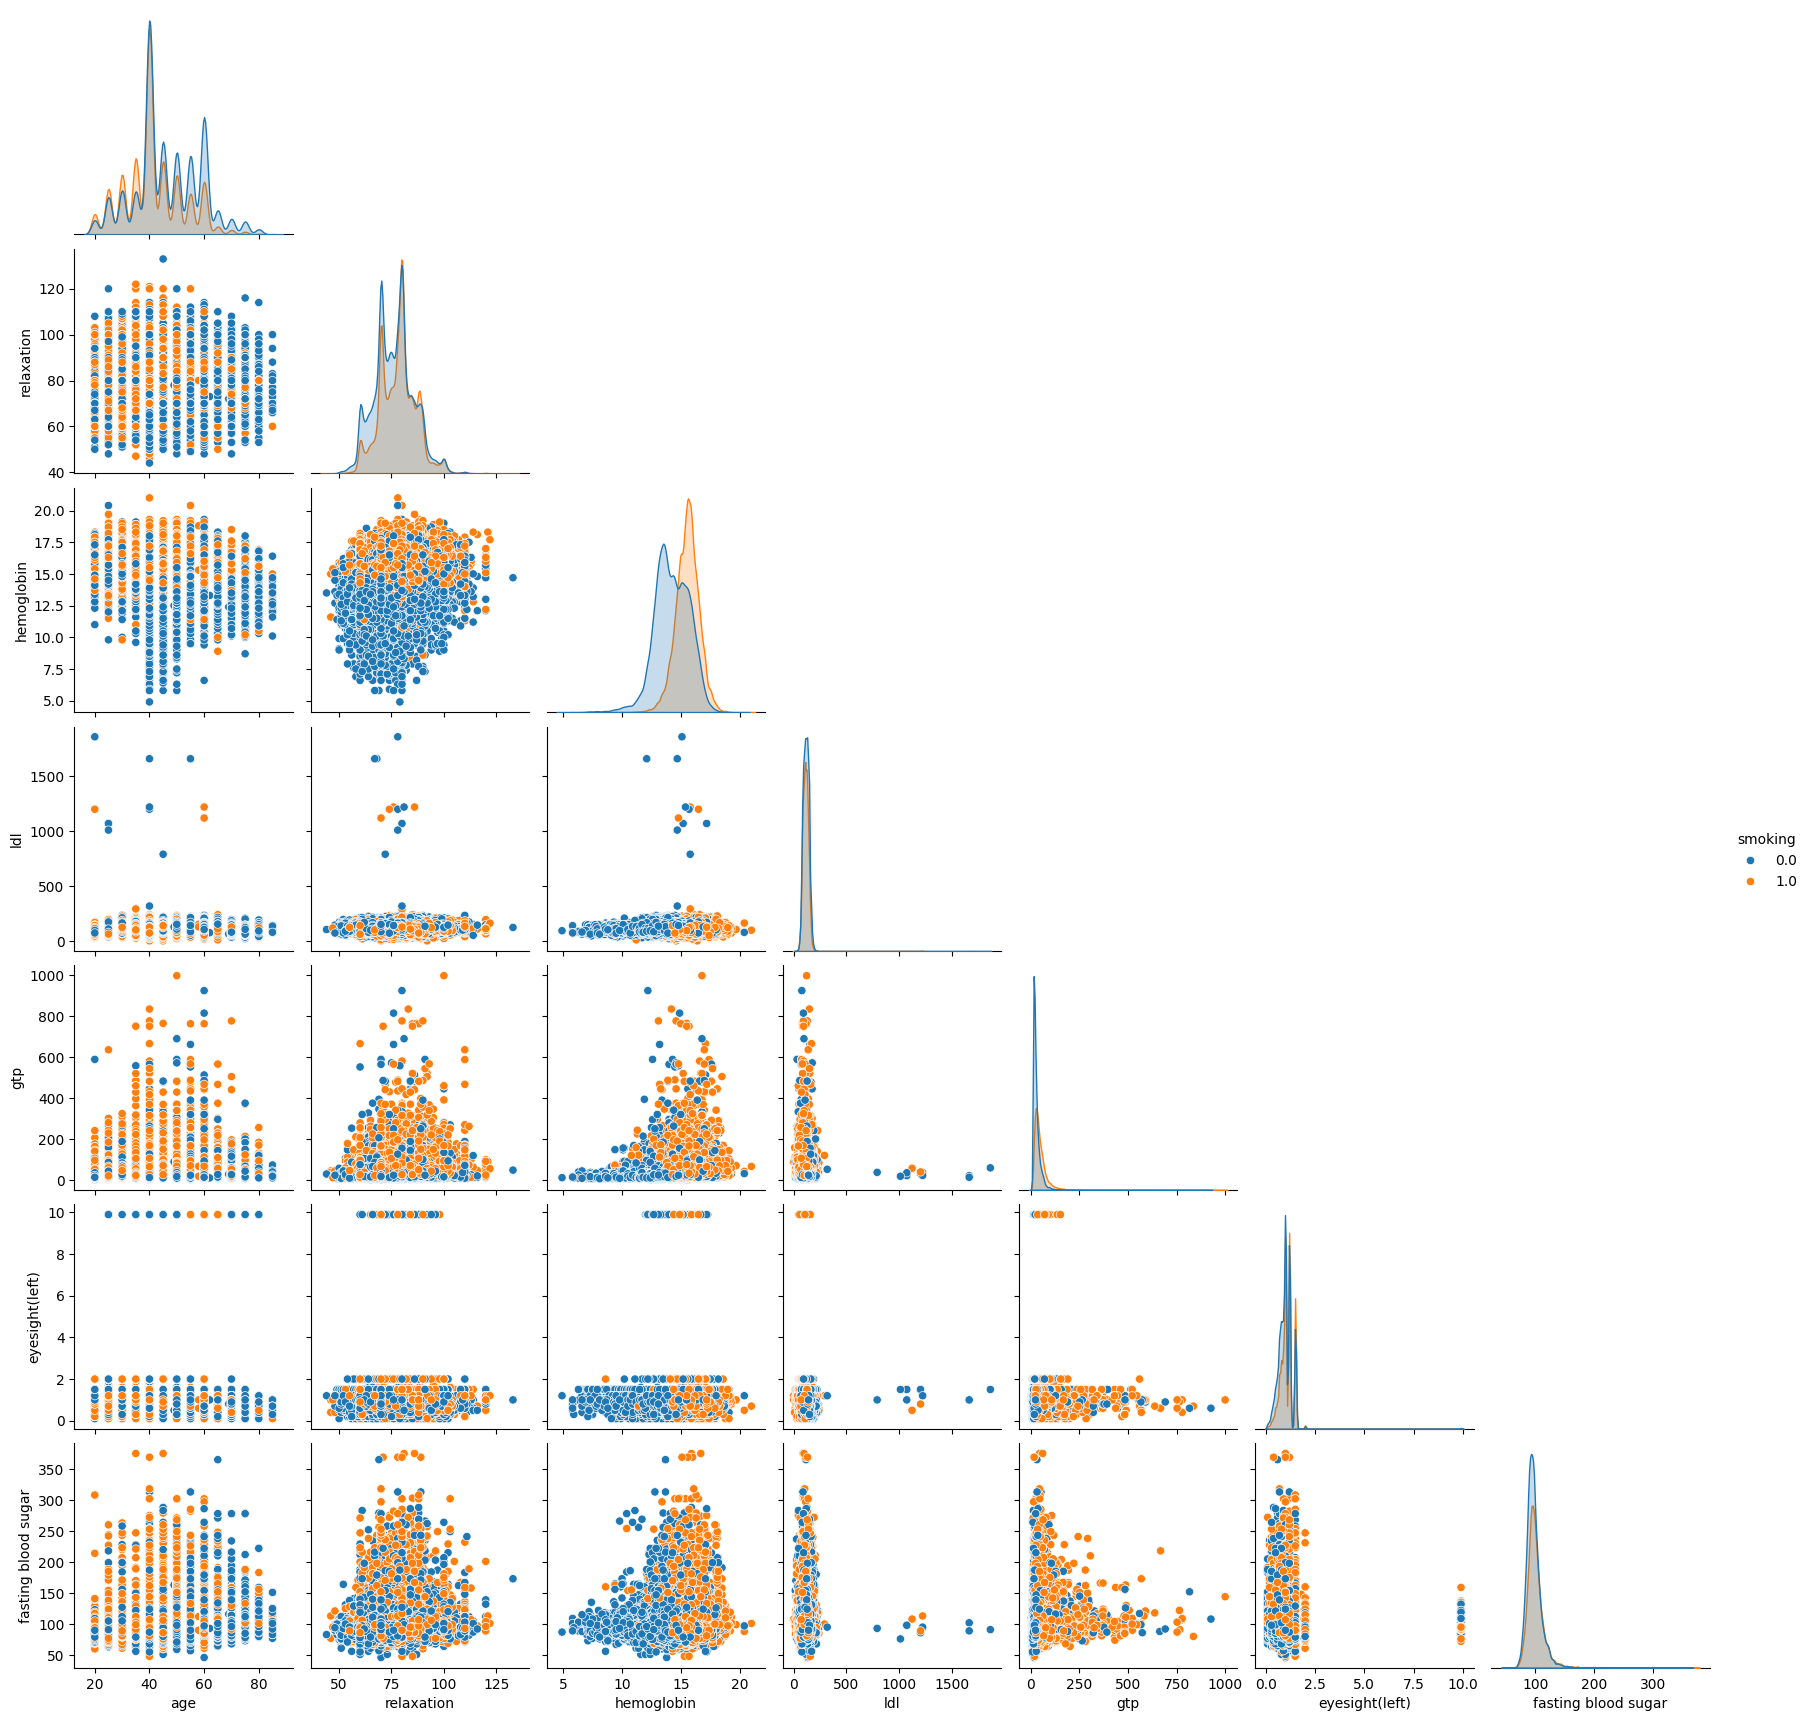

In [31]:
# Define numerical columns
numerical_columns = ['age', 'relaxation', 'hemoglobin', 'ldl', 'gtp', 'eyesight(left)', 'fasting blood sugar']

# Define categorical columns
categorical_columns = ['smoking', 'hearing(left)', 'hearing(right)']

# Combine numerical and categorical columns to be passed to pairplot
all_columns = numerical_columns + categorical_columns

# Create pairplot for both numerical and categorical columns
sns.pairplot(sample_df[all_columns], hue='smoking', corner=True)

# Show the plot
plt.show()

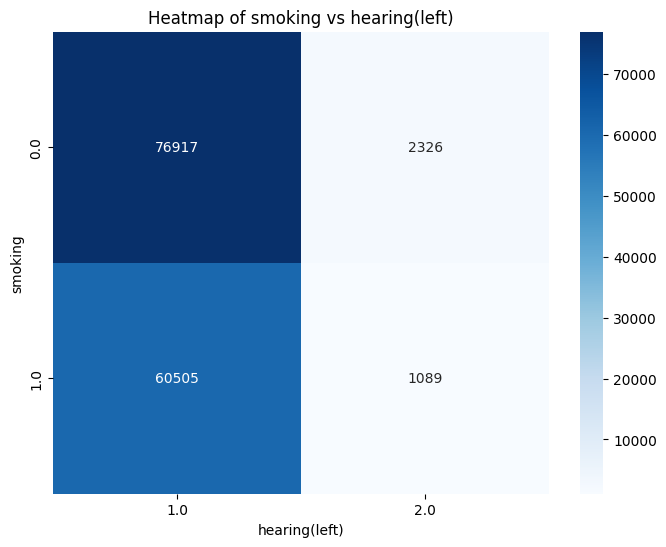

In [32]:
# Create a contingency table for two categorical variables
contingency_table = pd.crosstab(sample_df[categorical_columns[0]], sample_df[categorical_columns[1]])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f"Heatmap of {categorical_columns[0]} vs {categorical_columns[1]}")
plt.show()
